In [ ]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#access the local file using python code
from google.colab import files
uploaded = files.upload()

Saving df_scaled.csv to df_scaled.csv


In [ ]:
df_scaled = pd.read_csv('df_scaled.csv', dtype={'luxury_sales': str, 'fresh_sales': str, 'dry_sales': str, 'cluster_catgeory': object})
df_scaled.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_encoded
0,10702534.0,Batticaloa,4.696227504998888,0.5628779502266339,0.4227840469243136,3,1
1,10077758.0,Jaffna,4.693739169073539,0.6811196384150366,0.5339408533317452,3,7
2,10422537.0,Katunayake,4.693739169073539,0.6415420814694635,0.4967397129756445,3,11
3,10681767.0,Katunayake,4.691872917129526,0.6807157655914212,0.5335723962365271,3,11
4,10501537.0,Jaffna,4.69093979115752,0.5222748730720765,0.4962037753825998,3,7


# **KNN MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#read first few records of this data set
df_K = pd.read_csv('/content/df_scaled.csv')
df_K.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_encoded
0,10702534.0,Batticaloa,4.696228,0.562878,0.422784,3,1
1,10077758.0,Jaffna,4.693739,0.681120,0.533941,3,7
2,10422537.0,Katunayake,4.693739,0.641542,0.496740,3,11
3,10681767.0,Katunayake,4.691873,0.680716,0.533572,3,11
4,10501537.0,Jaffna,4.690940,0.522275,0.496204,3,7


In [ ]:
#drop customer id
df_K = df_K.drop('Customer_ID', axis=1)

In [ ]:
df_K.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_encoded
0,Batticaloa,4.696228,0.562878,0.422784,3,1
1,Jaffna,4.693739,0.681120,0.533941,3,7
2,Katunayake,4.693739,0.641542,0.496740,3,11
3,Katunayake,4.691873,0.680716,0.533572,3,11
4,Jaffna,4.690940,0.522275,0.496204,3,7


In [ ]:
#drop customer id
df_K = df_K.drop('outlet_city', axis=1)

In [ ]:
# Define features (X) and target variable (y)
X = df_K.drop('cluster_catgeory', axis=1)
y = df_K['cluster_catgeory']

In [ ]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

In [ ]:
#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)


X_train Instances (619317, 4)
X_test Instances (154830, 4)


In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
240208,6,6
101714,6,6
138351,6,6
616994,2,2
38934,5,5
...,...,...
495388,1,1
31599,5,5
157414,1,1
208553,1,1


# **ACCURACY AND CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



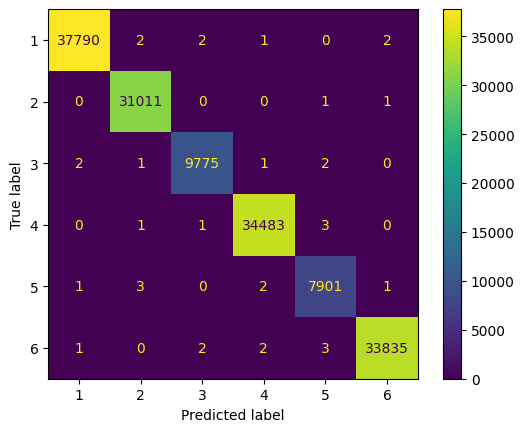

In [ ]:
#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)


#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

Text(0, 0.5, 'Mean Error')

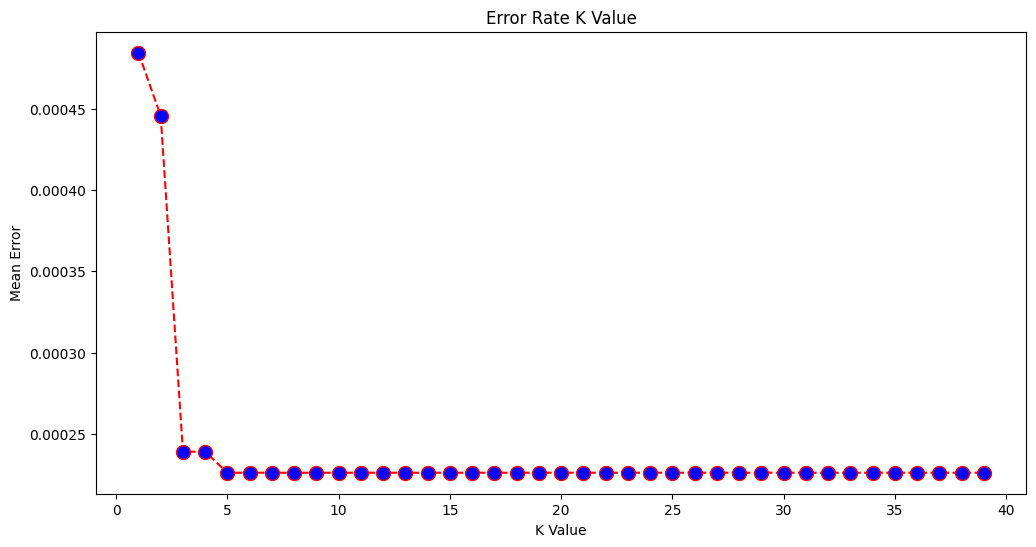

In [ ]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn1.fit(X_train,y_train)
#Perform predictions on the test data
y_pred=knn1.predict(X_test)

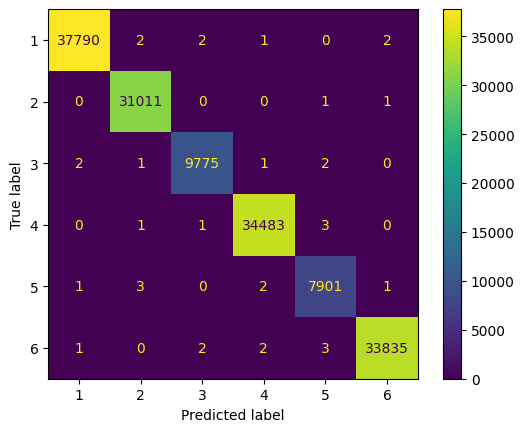

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [ ]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(1)}

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



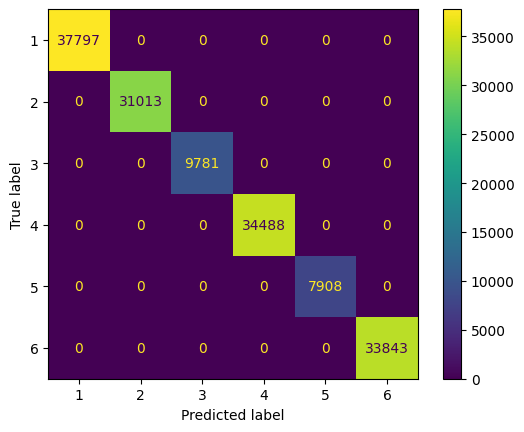

In [ ]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred))

# **CROSS VALIDATION**

In [ ]:
# Perform 5-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_gscv, X, y, cv=5, scoring='accuracy')

print("KNN CV Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py", line 634, in roc_auc_score
    raise ValueError("multi_class must be in ('ovo', 'ovr')")
ValueError: multi_class must be in ('ovo', 'ovr')

  warnings.warn(
/usr/local/lib/python3.11/

KNN CV Accuracy Scores: [0.89807531 0.93493509 0.91764463 0.92585368 0.87946057]
Mean Accuracy: 0.9111938551429015
Standard Deviation: 0.019996335517257182


In [ ]:
print("Train Accuracy:", knn1.score(X_train, y_train))
print("Test Accuracy:", knn1.score(X_test, y_test))

Train Accuracy: 0.9997529536570124
Test Accuracy: 0.9997739456177743


# **ACCURACY CURVES**

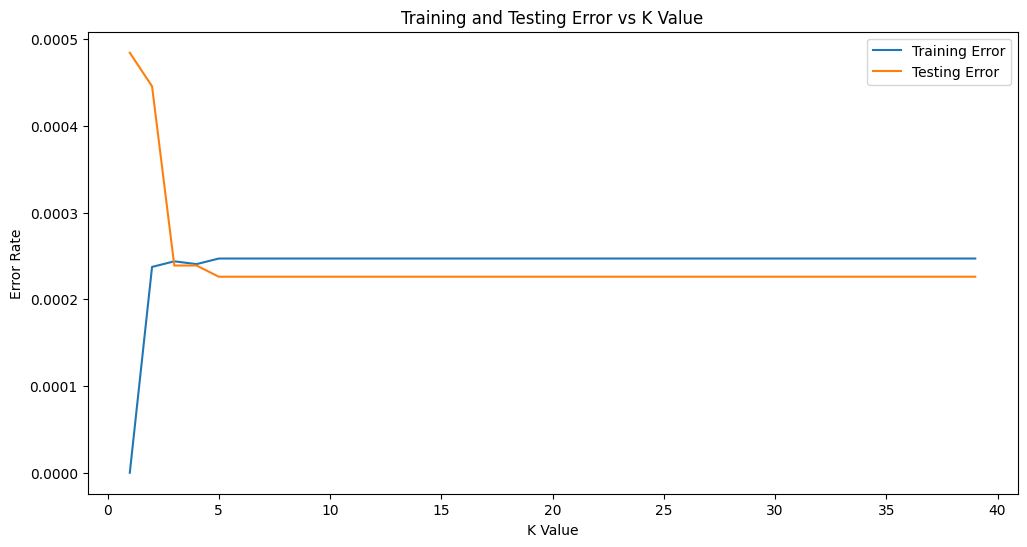

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # Import accuracy_score

# Calculate training and testing errors for different K values
train_errors = []
test_errors = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, train_pred))  # 1 - accuracy for error rate
    test_errors.append(1 - accuracy_score(y_test, test_pred))

# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), train_errors, label='Training Error')
plt.plot(range(1, 40), test_errors, label='Testing Error')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Training and Testing Error vs K Value')
plt.legend()
plt.show()

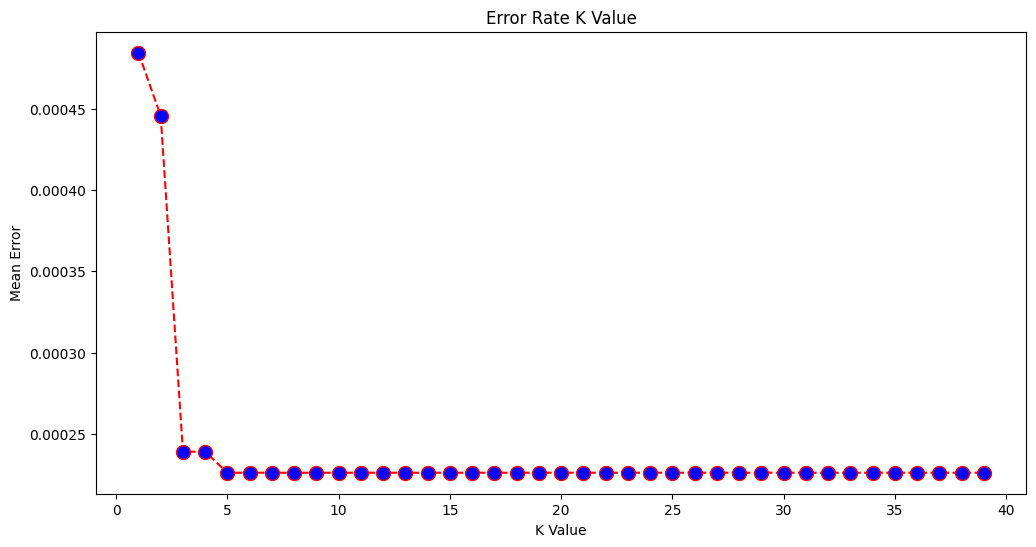

In [ ]:


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


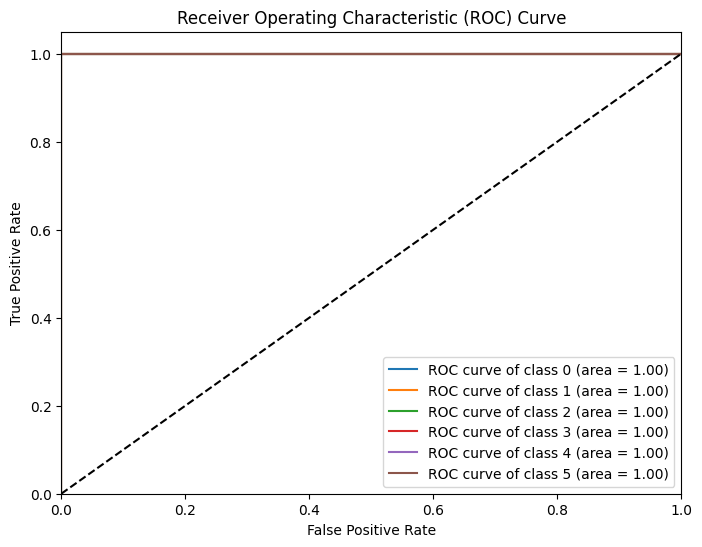

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have y_test and y_pred from your KNN model
y_test_bin = label_binarize(y_test, classes=knn_gscv.classes_)
y_pred_proba = knn_gscv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(knn_gscv.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
